<a href="https://colab.research.google.com/github/QuangLe102/Classification_animal/blob/main/Classification_animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install opensoundscape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 660 kB/s 
     |████████████████████████████████| 133 kB 3.1 MB/s 
     |████████████████████████████████| 793 kB 7.2 MB/s 
     |████████████████████████████████| 54.5 MB 1.3 MB/s 
     |████████████████████████████████| 8.8 MB 47.0 MB/s 
     |████████████████████████████████| 428 kB 49.1 MB/s 
     |████████████████████████████████| 132 kB 45.4 MB/s 
     |████████████████████████████████| 381 kB 44.0 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 344 kB 61.3 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 561 kB 42.2 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 50 k

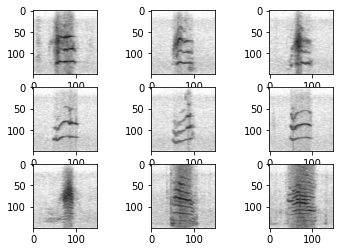

In [4]:
#import library

from sklearn.utils import shuffle

import math as m

import cv2
import wave
import pylab
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

with open('../content/drive/MyDrive/Classification_CNN.pickle', 'rb') as f:
  (x_train, y_train), (x_test, y_test) = pickle.load(f)
x_pre = x_test
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
y_train.shape

(1800,)

In [20]:
y_test.shape

(200,)

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(1800, 10)

In [5]:
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [6]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 30, batch_size=64, validation_data = (x_test, y_test), verbose = 1)
model.save('Classification.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
29/29 [==============================] - 76s 3s/step - loss: 2.5021 - accuracy: 0.1078 - val_loss: 2.2867 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 70s 2s/step - loss: 2.1955 - accuracy: 0.1583 - val_loss: 1.9834 - val_accuracy: 0.3900
Epoch 3/30
29/29 [==============================] - 71s 2s/step - loss: 1.8757 - accuracy: 0.2733 - val_loss: 1.6474 - val_accuracy: 0.3950
Epoch 4/30
29/29 [==============================] - 69s 2s/step - loss: 1.6660 - accuracy: 0.3483 - val_loss: 1.5606 - val_accuracy: 0.3200
Epoch 5/30
29/29 [==============================] - 69s 2s/step - loss: 1.6495 - accuracy: 0.3561 - val_loss: 1.5627 - val_accuracy: 0.3750
Epoch 6/30
29/29 [==============================] - 70s 2s/step - loss: 1.4793 - accuracy: 0.4283 - val_loss: 1.5326 - val_accuracy: 0.3300
Epoch 7/30
29/29 [==============================] - 68s 2s/step - loss: 1.5053 - accuracy: 0.4072 - val_loss: 1.8420 - val_accuracy: 0.2650
Epoch 8/30
29/29 [==

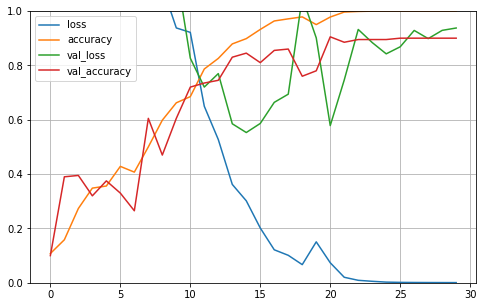

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [5]:
from keras.models import load_model
model1 = keras.models.load_model('../content/Classification.h5')

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [56]:
y_hat = model1.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6,
       1, 1, 1, 1, 0, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 7, 7, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4,
       7, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 9, 1, 1, 1, 9,
       9, 9])

In [58]:
y_test_label = np.argmax(y_test, axis = 1)
y_test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [59]:
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

Accuracy: 0.900000
Precision: 0.909137
Recall: 0.900000
F1 score: 0.900094
ROC AUC: 0.984972
[[20  0  0  0  0  0  0  0  0  0]
 [ 1 16  0  0  1  0  1  1  0  0]
 [ 0  2 16  0  0  0  0  2  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  1  0 18  1  0  0]
 [ 0  0  0  0  0  1  0 19  0  0]
 [ 0  0  0  0  1  0  0  1 16  2]
 [ 0  5  0  0  0  0  0  0  0 15]]


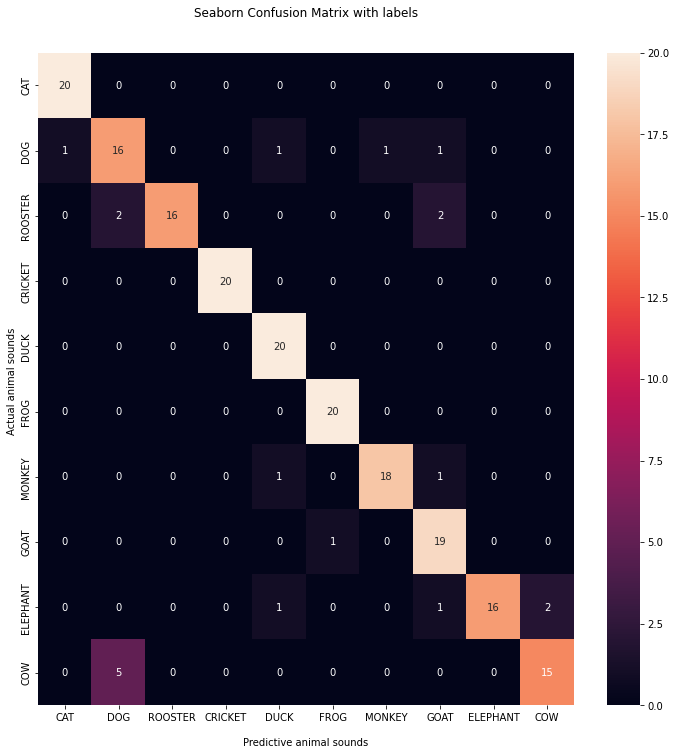

In [60]:
import seaborn as sns
plt.subplots(figsize = (12,12))
ax = sns.heatmap(matrix, annot=True)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredictive animal sounds')
ax.set_ylabel('Actual animal sounds ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW'])
ax.yaxis.set_ticklabels(['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW'])

## Display the visualization of the Confusion Matrix.

plt.show()

(150, 150, 3)
[0]


'CAT'

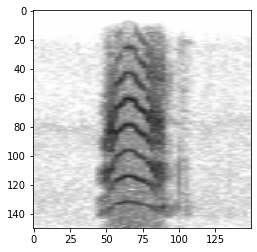

In [9]:
#Classify by image in test file
#Each animal has 20 audio files in the test file
test =15
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1, 150, 150, 3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model1.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]

(150, 150, 3)
[2]


'ROOSTER'

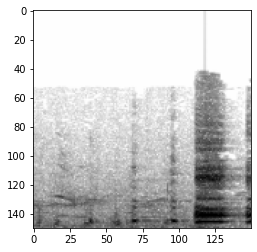

In [82]:
test =50
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1, 150, 150, 3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model1.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]

In [57]:
#Classify by audio files
import IPython.display as ipd
import librosa.display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def Classification (wav):
  ipd.display(ipd.Audio(wav))
  signal, sr = librosa.load(wav, duration=10)  # sr = sampling rate

  audio = Audio.from_file(wav)
  image_shape = (150, 150)
  spectrogram = Spectrogram.from_audio(audio)

  # Convert Spectrogram object to Python Imaging Library (PIL) Image
  image = spectrogram.to_image(shape=image_shape,invert=True)

  # Save image to file
  image.save("test.png")
  img = load_img("test.png", target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img = img / 255
  pred = np.argmax(model1.predict(img), axis = 1)
  Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
  print(pred)
  print("The sound is predicted to be that of a "+Label[pred[0]])

[0]
The sound is predicted to be that of a CAT


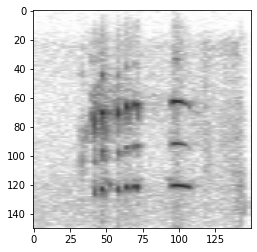

In [70]:
#CAT
dir_wav = "../content/drive/MyDrive/WAV/1.CAT/B_ANI01_MC_FN_SIM01_103.wav"
Classification (dir_wav)

[1]
The sound is predicted to be that of a DOG


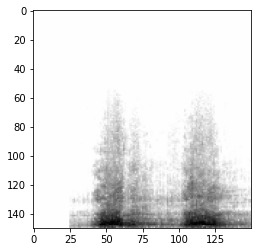

In [71]:
#DOG
dir_wav = "../content/drive/MyDrive/WAV/2.DOG/DOG1_5.wav"
Classification (dir_wav)

[2]
The sound is predicted to be that of a ROOSTER


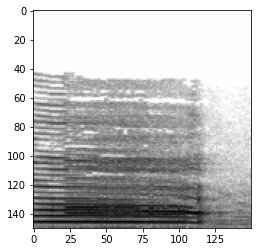

In [73]:
#ROOSTER
dir_wav = "../content/drive/MyDrive/WAV/3.ROOSTER/Gatrong_out_18.wav"
Classification (dir_wav)

[3]
The sound is predicted to be that of a CRICKET


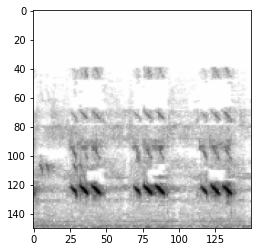

In [74]:
#CRICKET
dir_wav = "../content/drive/MyDrive/WAV/4.CRICKET/1215_out_100.wav"
Classification (dir_wav)

[4]
The sound is predicted to be that of a DUCK


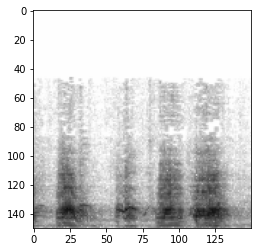

In [75]:
#DUCK
dir_wav = "../content/drive/MyDrive/WAV/5.DUCK/CONVIT_out_1_out_15.wav"
Classification (dir_wav)

[5]
The sound is predicted to be that of a FROG


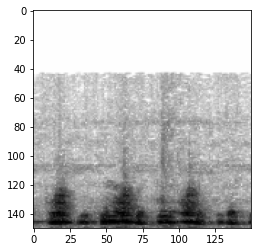

In [76]:
#FROG
dir_wav = "../content/drive/MyDrive/WAV/6.FROG/FROG_out_1_out_22.wav"
Classification (dir_wav)

[6]
The sound is predicted to be that of a MONKEY


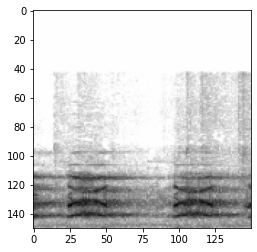

In [77]:
#MONKEY
dir_wav = "../content/drive/MyDrive/WAV/7.MONKEY/mokey158_out_1_out_50.wav"
Classification (dir_wav)

[7]
The sound is predicted to be that of a GOAT


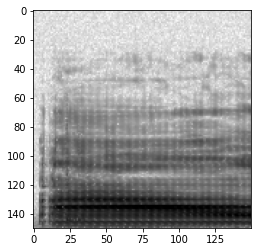

In [78]:
#GOAT
dir_wav = "../content/drive/MyDrive/WAV/8.GOAT/GOATT1_5.wav"
Classification (dir_wav)

[8]
The sound is predicted to be that of a ELEPHANT


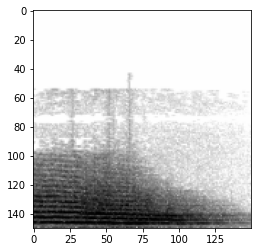

In [81]:
#ELEPHANT
dir_wav = "../content/drive/MyDrive/WAV/9.ELEPHANT/ElephantSounds_out_1_out_14.wav"
Classification (dir_wav)

[9]
The sound is predicted to be that of a COW


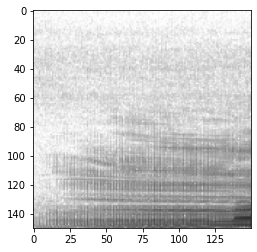

In [80]:
#COW
dir_wav = "../content/drive/MyDrive/WAV/10.COW/COWT1_9.wav"
Classification (dir_wav)

In [84]:
#Classify by load spectrogram image
import IPython.display as ipd
import librosa.display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def Classification_img (img_dir):
  img = load_img(img_dir, target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img /= 255
  pred = np.argmax(model1.predict(img), axis = 1)
  print(pred)
  Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
  print(Label[pred[0]])

[0]
CAT


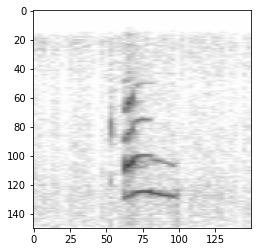

In [85]:
#CAT
img_dir = "../content/drive/MyDrive/DATASETS_SPLIT/TEST/1.CAT/CAT0201.png"
Classification_img (img_dir)

[1]
DOG


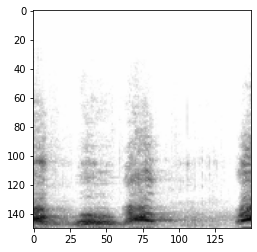

In [87]:
#DOG
img_dir = "../content/drive/MyDrive/DATASETS_SPLIT/TEST/2.DOG/DOG0095.png"
Classification_img (img_dir)

[2]
ROOSTER


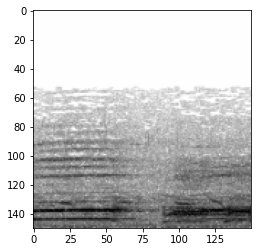

In [88]:
#ROOSTER
img_dir = "../content/drive/MyDrive/DATASETS_SPLIT/TEST/3.ROOSTER/ROOSTER0164.png"
Classification_img (img_dir)

[3]
CRICKET


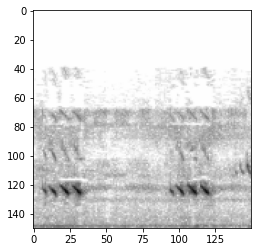

In [89]:
#CRICKET
img_dir = "../content/drive/MyDrive/DATASETS_SPLIT/TEST/4.CRICKET/CRICKET0133.png"
Classification_img (img_dir)

In [ ]:
def record_audio ():
  input("Press Enter to start record......")
  m = sd.rec(3*fs, )

In [ ]:
#vẽ hàm loss function trong quá trình huấn luyện
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()
#đánh giá qua độ chính xác trên tập test
test_audio = []
test_labels = []
for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())
test_audio = np.array(test_audio)
test_labels = np.array(test_labels)
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')
#vẽ confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
#sns.heatmap(confusion_mtx, xticklabels=label_name, yticklabels=label_name, 
         #   annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
